Exercise 3 @ Data Mining Course  
------
   
Name: **Mohammad Hossein Komeili**  
SID: **99422163** 


Professor: **Dr. Farahani**  
TAs: **Mr. Ali Sharifi** - **Mr. Navid Kashi**     
**CS** @ **SBU**  
Spring 2021  


# Importing needed libraries 

In [180]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import tensorflow as tf

# functions for feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# functions for deep learning
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

# functions from statsmodel 
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

# functions for calculating metrics
from sklearn import metrics
 
# ML methods 
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# setting some parameters for better plots
%matplotlib inline

# Mobile Price Classification Dataset 

question 1 to 15 uses [Mobile Price Classification Dataset](https://kaggle.com/iabhishekofficial/mobile-price-classification)

## Downloading data from kaggle

In [35]:
!pip install kaggle

from google.colab import files
files.upload()

# before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

#import the dataset we want to use for our project
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

# Extract the data
import zipfile
zip_ref = zipfile.ZipFile('mobile-price-classification.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

Saving kaggle.json to kaggle.json
  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 26.1MB/s]


## Data preparation


In [80]:
# Data reading
train_data = pd.read_csv('./files/train.csv')
test_data = pd.read_csv('./files/test.csv')

In [81]:
train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [82]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [83]:
train_data.shape

(2000, 21)

In [84]:
train_data['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [85]:
# Data splitting
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['price_range']), 
                                                  train_data['price_range'], train_size=0.8, 
                                                  stratify=train_data['price_range'], random_state=17)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1600, 20), (400, 20), (1600,), (400,))

## Experimenting different models

### SVM



In [86]:
# specifying kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# specifying C for hard or soft margin
Cs = [100, 10, 1, 0.1, 0.01]

models = {}

for kernel in kernels:

  models[kernel] = []

  for i, C in enumerate(Cs):
    cls = svm.SVC(kernel=kernel, C=C)
    cls.fit(X_train, y_train)
    y_val_pred = cls.predict(X_val) 

    models[kernel].append(metrics.accuracy_score(y_val, y_val_pred))

In [87]:
models

{'linear': [0.9875, 0.9925, 0.9925, 0.99, 0.985],
 'poly': [0.985, 0.98, 0.9675, 0.9525, 0.835],
 'rbf': [0.9825, 0.975, 0.9725, 0.9175, 0.8],
 'sigmoid': [0.1925, 0.1925, 0.2175, 0.2125, 0.235]}

In [88]:
mv = list(models.values())
mk = list(models.keys())

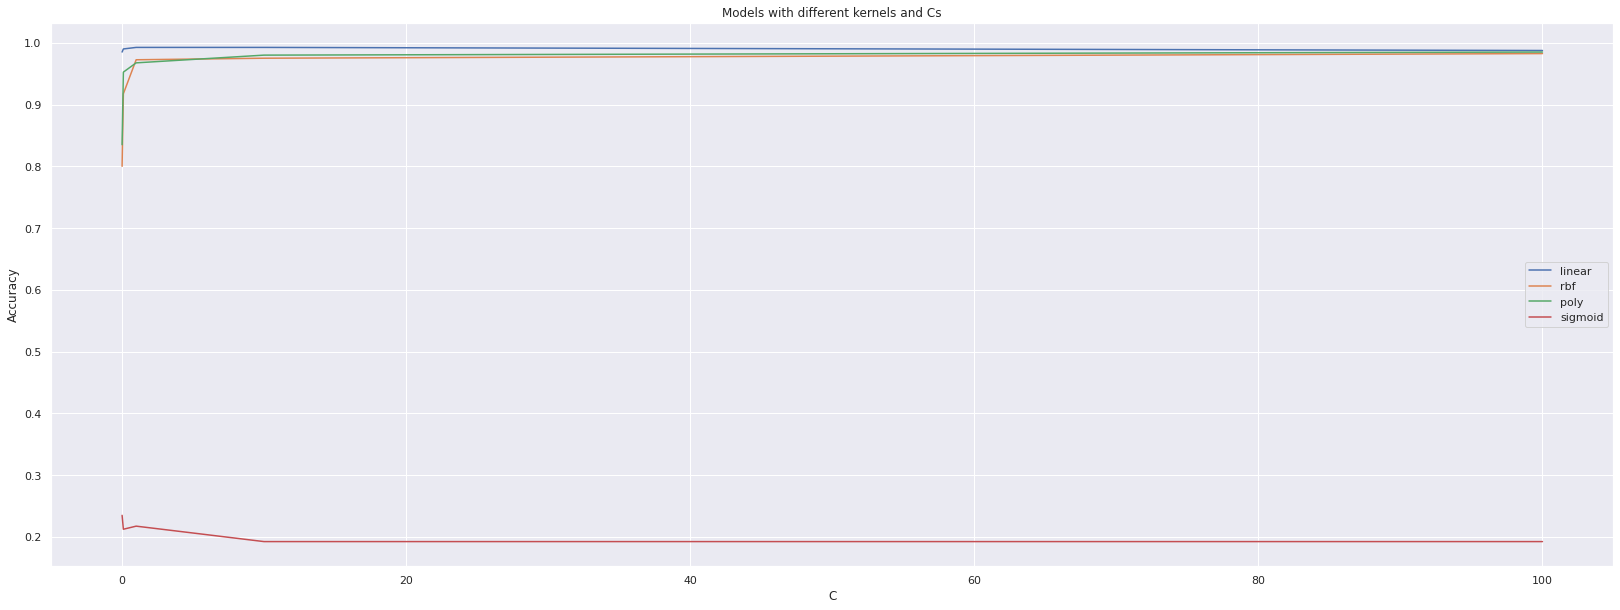

In [101]:
# plotting the results
plt.figure(figsize=(28,10))
plt.plot(Cs, mv[0],Cs, mv[1],Cs, mv[2],Cs, mv[3])
# plt.xticks(Cs)
# plt.yticks(np.array(range))
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Models with different kernels and Cs')
plt.legend(mk)
plt.show()

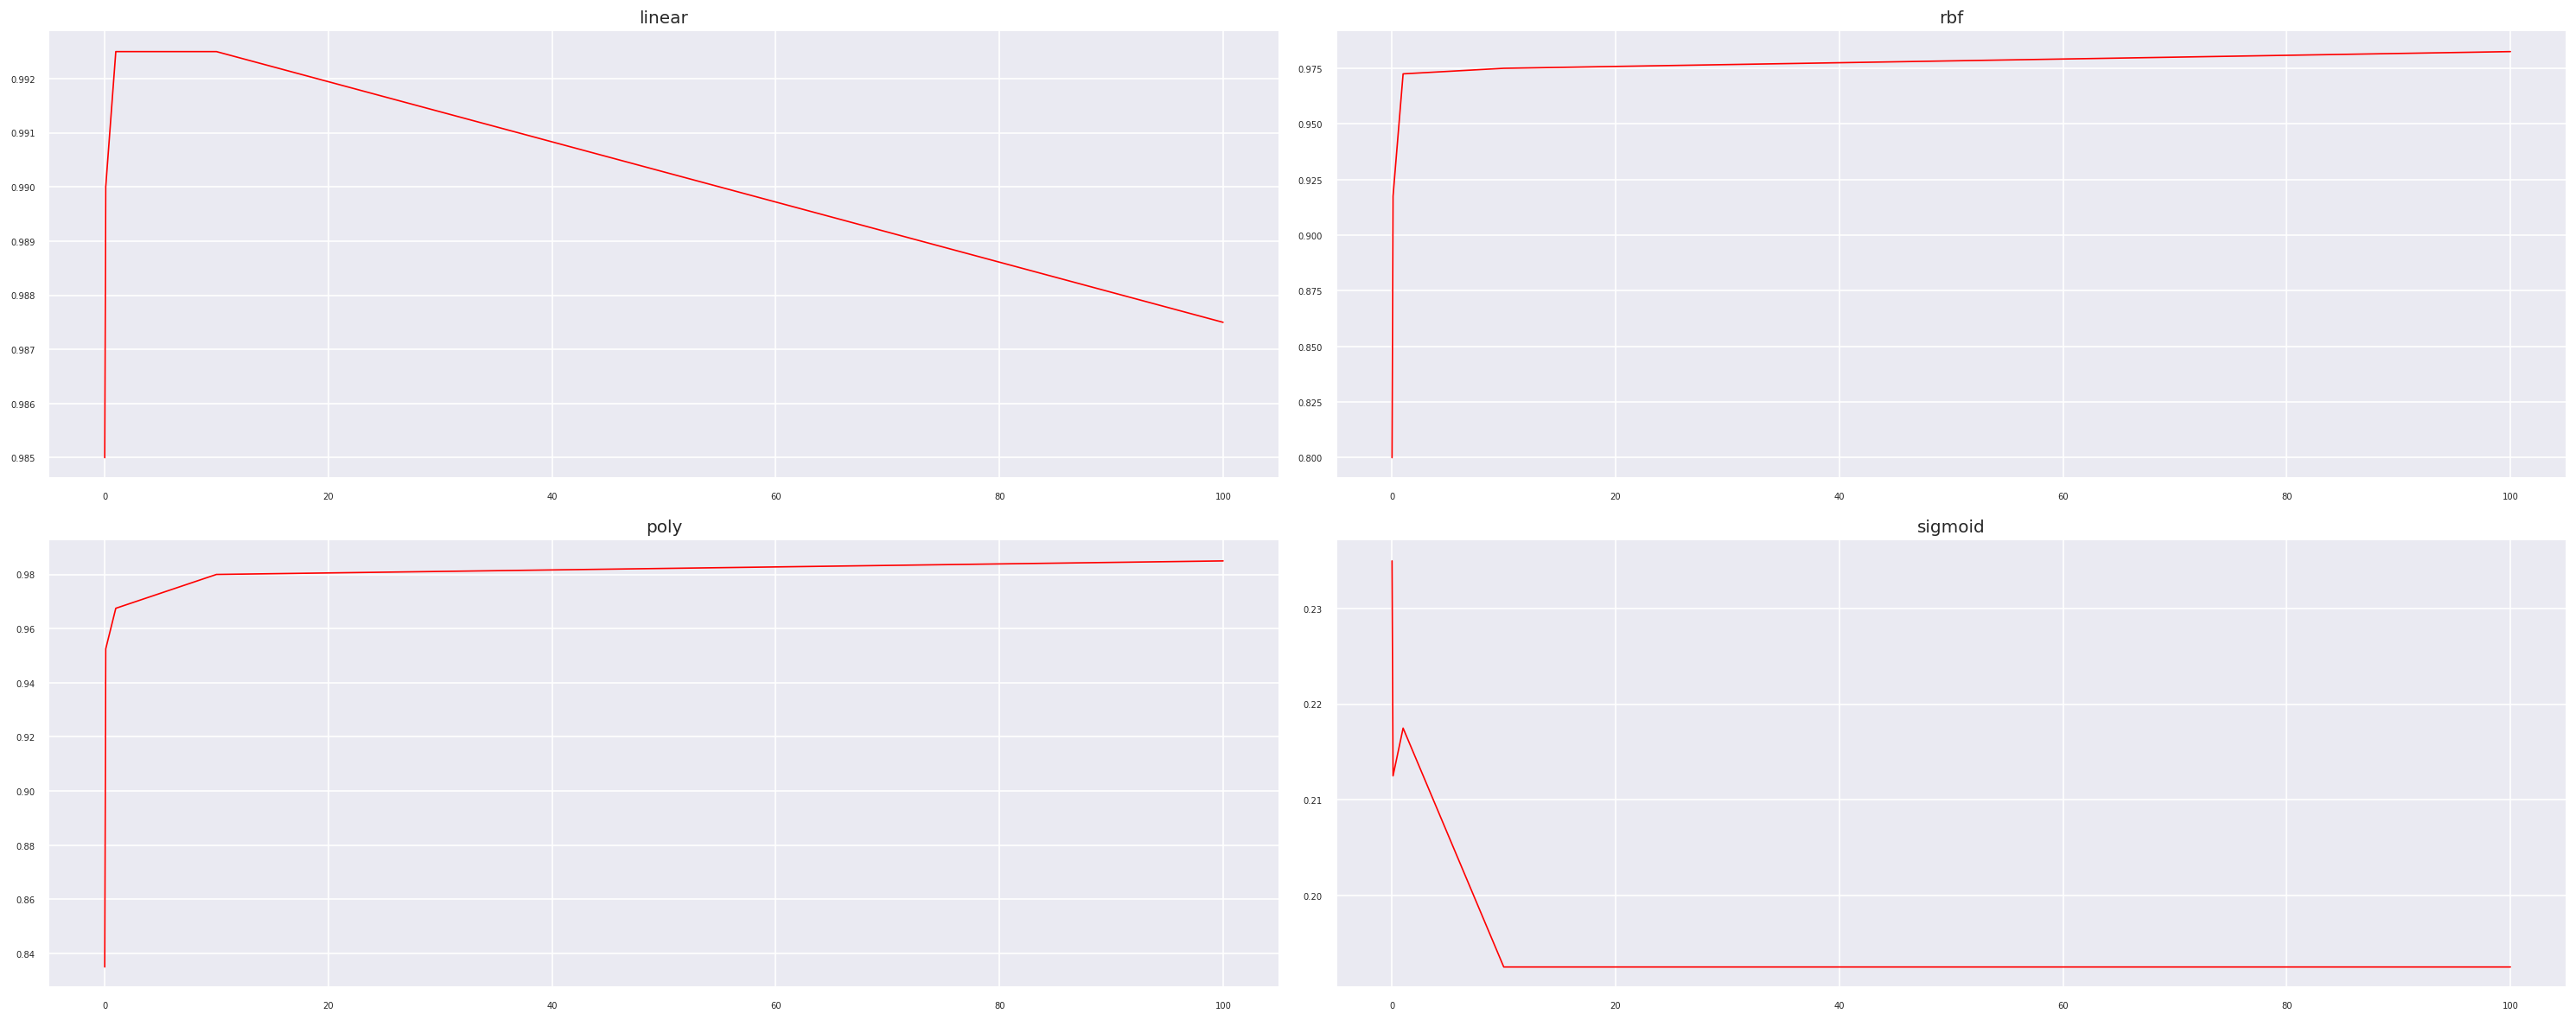

In [102]:
# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(25,10))
for i, ax in enumerate(axes.flatten()):
    
    ax.plot(Cs, mv[i] ,color='red', linewidth=1)
    # Decorations
    ax.set_title(mk[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### Feature Engineering

#### a. binning on battery_power

In [103]:
X_train['battery_power'].describe()

count    1600.000000
mean     1240.055000
std       438.285609
min       501.000000
25%       860.000000
50%      1228.500000
75%      1617.000000
max      1997.000000
Name: battery_power, dtype: float64

In [104]:
# 4 buckets with the same size 
train_f = train_data.copy()
bins = [0, 500, 1000, 1500, 2000]
labels =[1, 2, 3, 4]
train_f['battery_power_bin'] = pd.cut(train_f['battery_power'], bins=bins,labels=False)
train_f.drop(columns=['battery_power'])


# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_f.drop(columns=['price_range']),
                                                  train_f['price_range'], train_size = 0.8,
                                                  stratify=train_f['price_range'], random_state=17)

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.99      0.98      0.98       100
           2       0.98      0.99      0.99       100
           3       1.00      1.00      1.00       100

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [105]:
 # 7 buckets with the same size
train_f = train_data.copy()
bins = [0, 500, 750, 1000, 1250, 1500, 1750, 2000]
labels =[1, 2, 3, 4, 5, 6, 7]
train_f['battery_power_bin'] = pd.cut(train_f['battery_power'], bins=bins,labels=False)
train_f.drop(columns=['battery_power'])


# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_f.drop(columns=['price_range']), 
                                                  train_f['price_range'], train_size = 0.8, 
                                                  stratify=train_f['price_range'], random_state=17)

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.99      0.98      0.98       100
           2       0.98      0.99      0.99       100
           3       1.00      1.00      1.00       100

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [106]:
 # 7 buckets with the fifferent size
train_f = train_data.copy()
bins = [0, 500, 1000, 1200, 1300, 1400, 1500, 2000]
labels =[1, 2, 3, 4, 5, 6, 7]
train_f['battery_power_bin'] = pd.cut(train_f['battery_power'], bins=bins,labels=False)
train_f.drop(columns=['battery_power'])


# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_f.drop(columns=['price_range']), 
                                                  train_f['price_range'], train_size = 0.8, 
                                                  stratify=train_f['price_range'], random_state=17)

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.99      0.98      0.98       100
           2       0.98      0.99      0.99       100
           3       1.00      1.00      1.00       100

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [107]:
 # 1 bucket : treat all the values of the battery power the same :))
 # in this part we are ignoring battery power in some ways

train_f = train_data.copy()
bins = [0, 2000]
labels =[1]
train_f['battery_power_bin'] = pd.cut(train_f['battery_power'], bins=bins,labels=False)
train_f.drop(columns=['battery_power'])


# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_f.drop(columns=['price_range']), 
                                                  train_f['price_range'], train_size = 0.8, 
                                                  stratify=train_f['price_range'], random_state=17)

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.99      0.98      0.98       100
           2       0.98      0.99      0.99       100
           3       1.00      1.00      1.00       100

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



#### b. one-hot encoding on categorical features

In [108]:
def onehot_encoding(df, column):
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [109]:
train_data['wifi'].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

In [110]:
categoricals = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
train_f = train_data.copy()
for column in categoricals:
    train_f = onehot_encoding(train_f, column)


# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_f.drop(columns=['price_range']), 
                                                  train_f['price_range'], train_size = 0.8, 
                                                  stratify=train_f['price_range'], random_state=17)


# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.99      0.98      0.98       100
           2       0.98      0.99      0.99       100
           3       1.00      1.00      1.00       100

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



#### c. data transformations

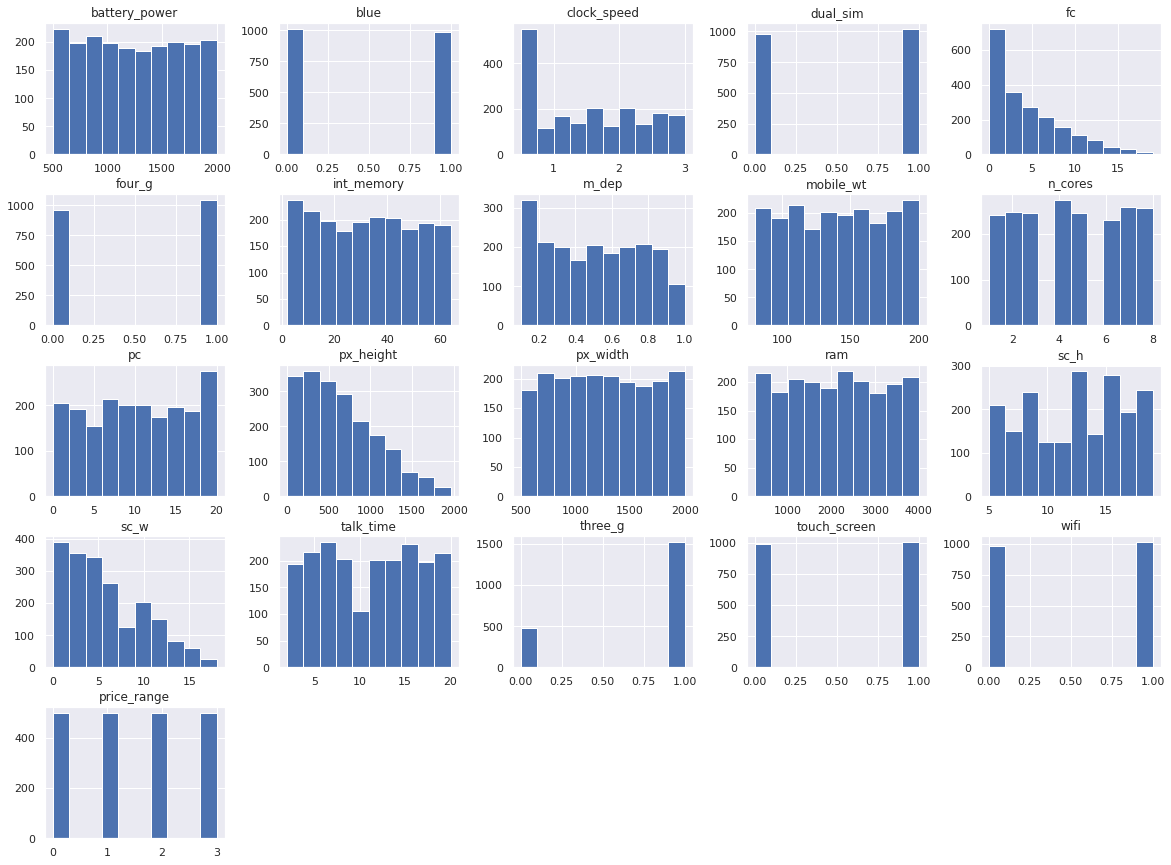

In [111]:
# distribution of all features

train_data.hist(figsize=(20,15))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



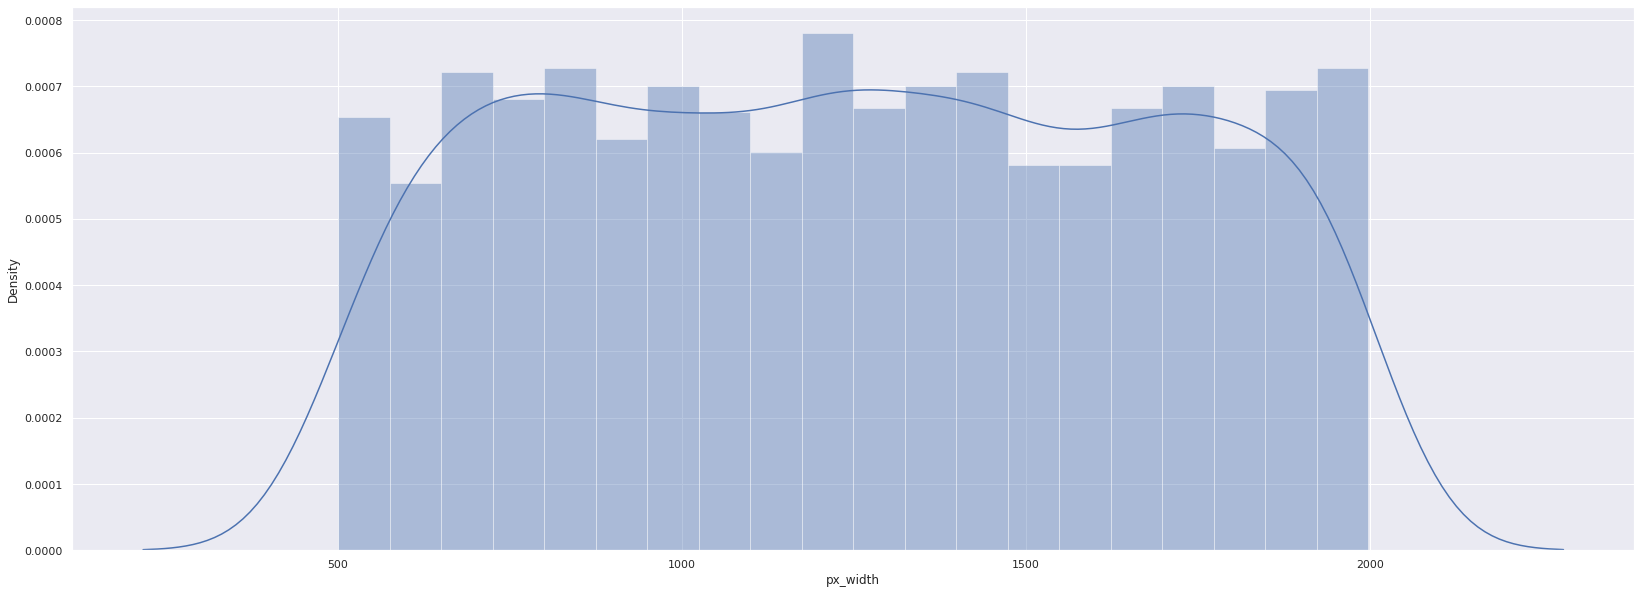

In [113]:
# distribution of 'px_width'
sns.set(rc={'figure.figsize':(28,10)})
sns.distplot(train_data['px_width'],kde_kws={"label": 'fc'}, bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



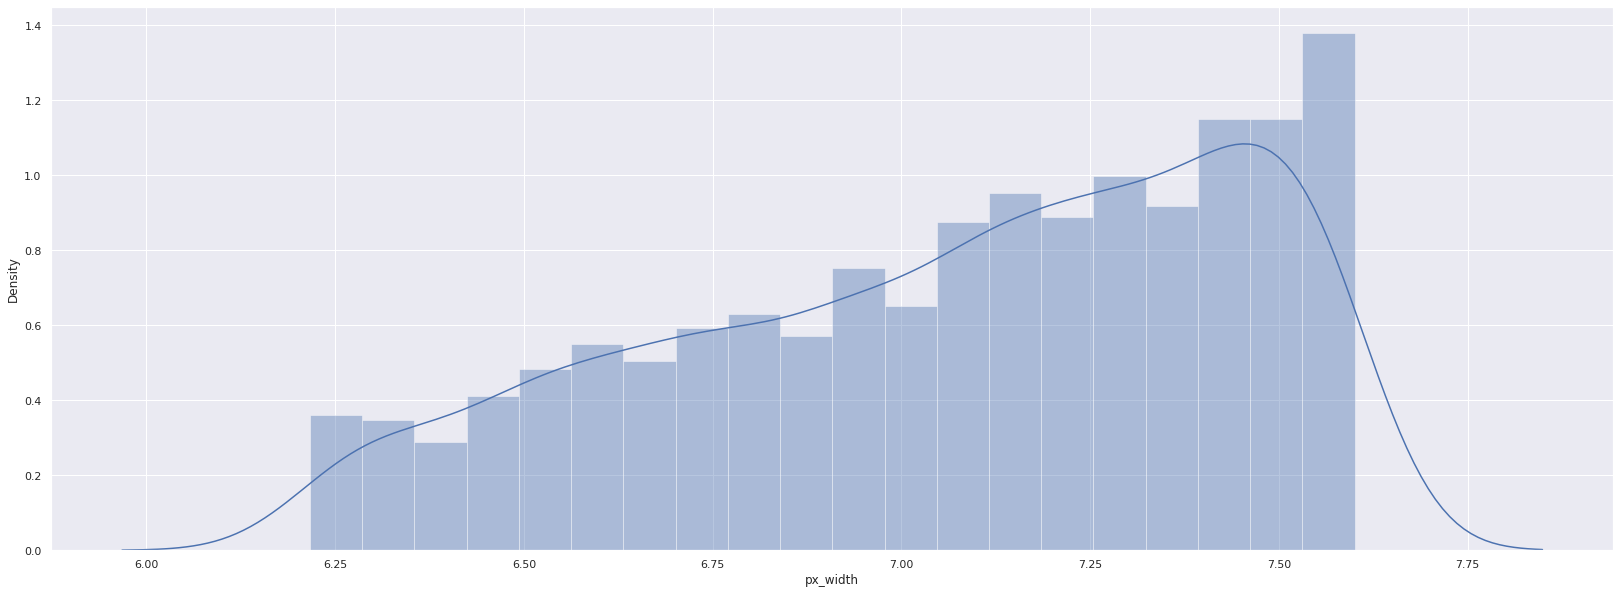

In [115]:
# distribution of log transformed 'px_width'
sns.set(rc={'figure.figsize':(28,10)})
sns.distplot(np.log(train_data["px_width"]- (train_data['fc'].min()-1)),kde_kws={"label": 'fc'}, bins=20)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



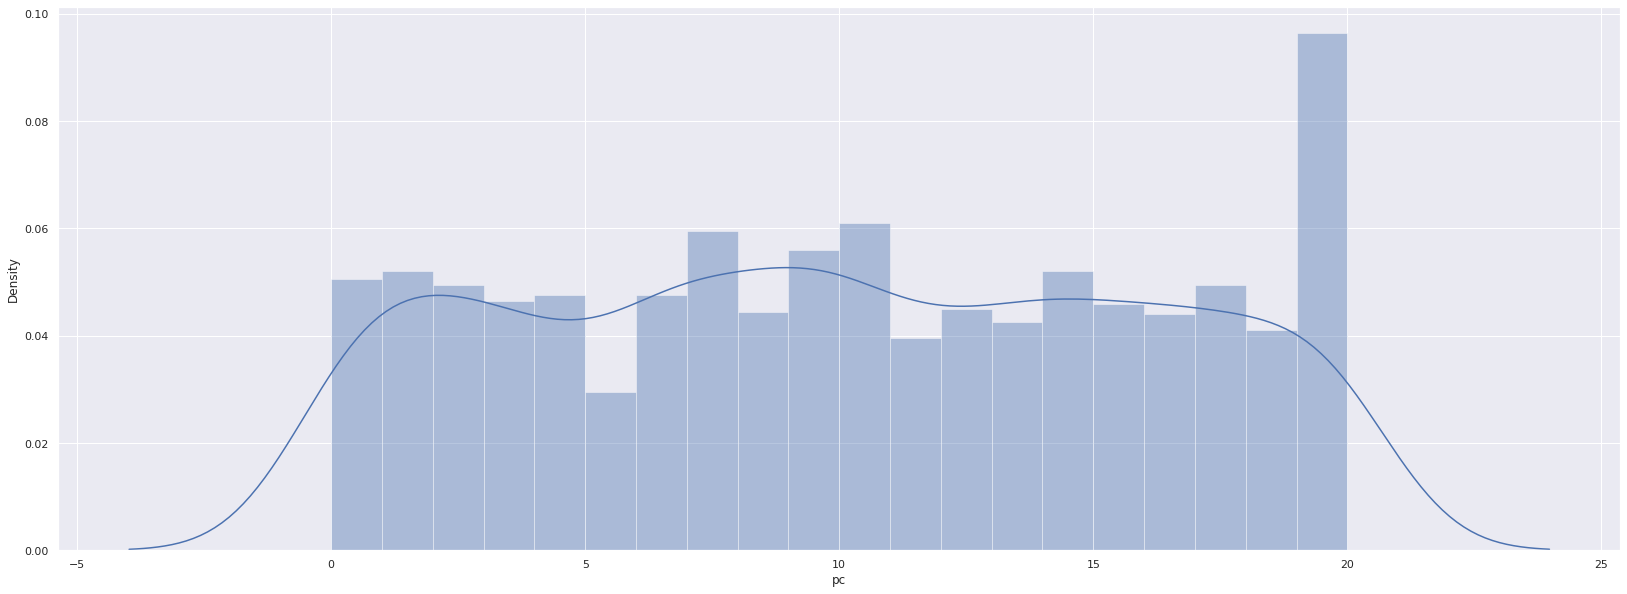

In [116]:
# distribution of 'pc'
sns.set(rc={'figure.figsize':(28,10)})
sns.distplot(train_data['pc'],kde_kws={"label": 'fc'}, bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



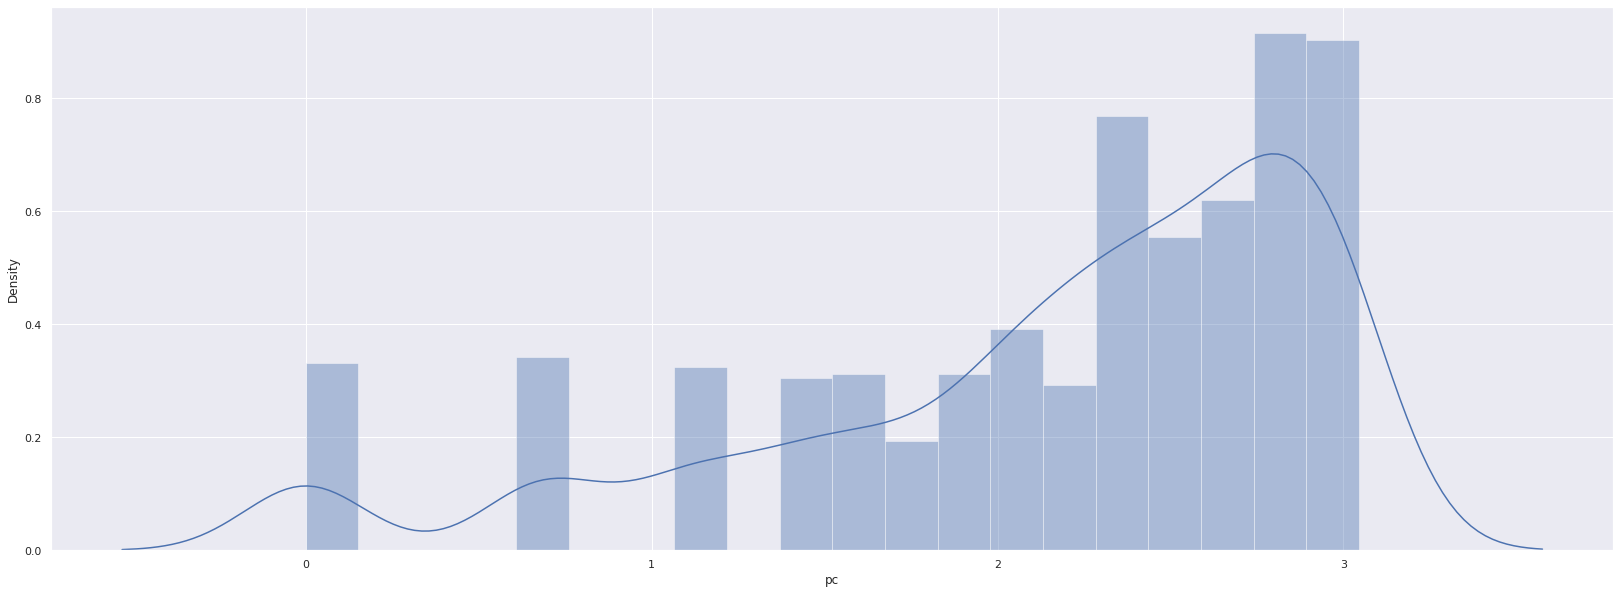

In [117]:
# distribution of log transformed 'pc'
sns.set(rc={'figure.figsize':(28,10)})
sns.distplot(np.log(train_data["pc"]- (train_data['fc'].min()-1)),kde_kws={"label": 'fc'}, bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



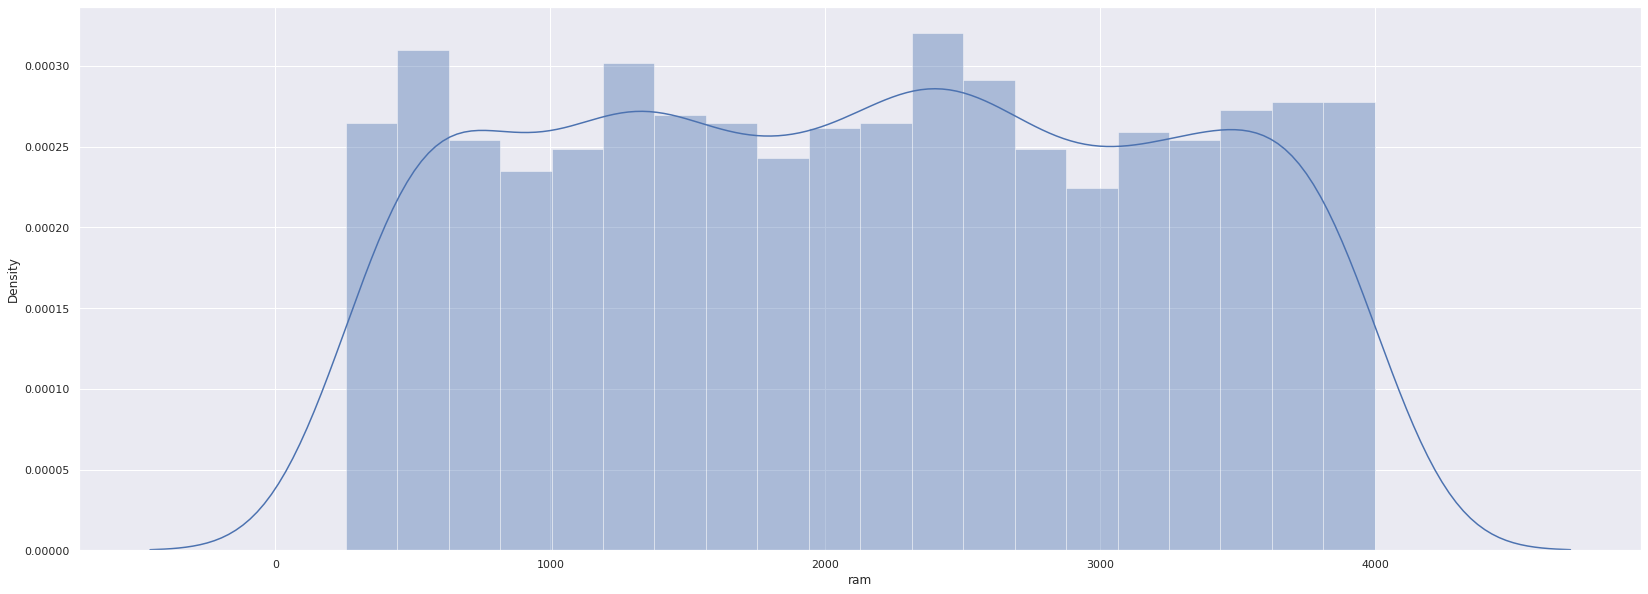

In [119]:
# distribution of 'ram'
sns.set(rc={'figure.figsize':(28,10)})
sns.distplot(train_data['ram'],kde_kws={"label": 'fc'}, bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



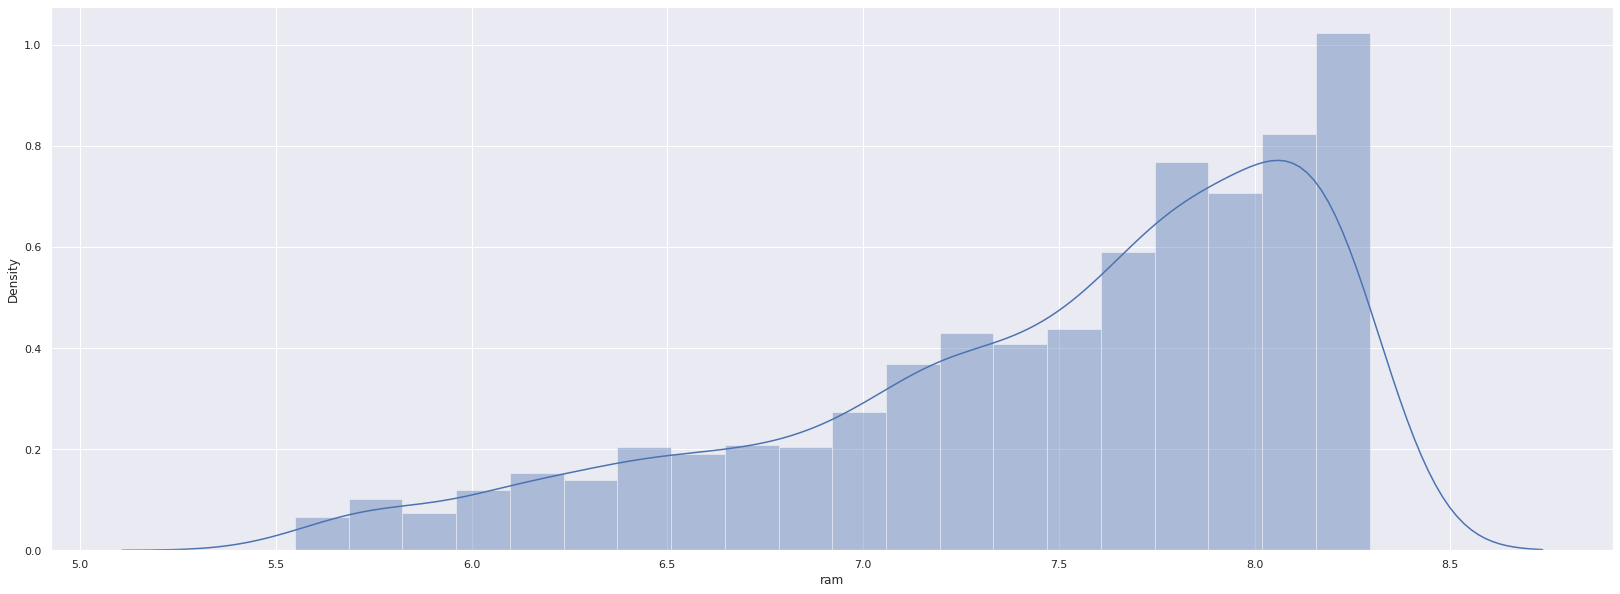

In [120]:
# distribution of log transformed 'ram'
sns.set(rc={'figure.figsize':(28,10)})
sns.distplot(np.log(train_data["ram"]- (train_data['fc'].min()-1)),kde_kws={"label": 'fc'}, bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



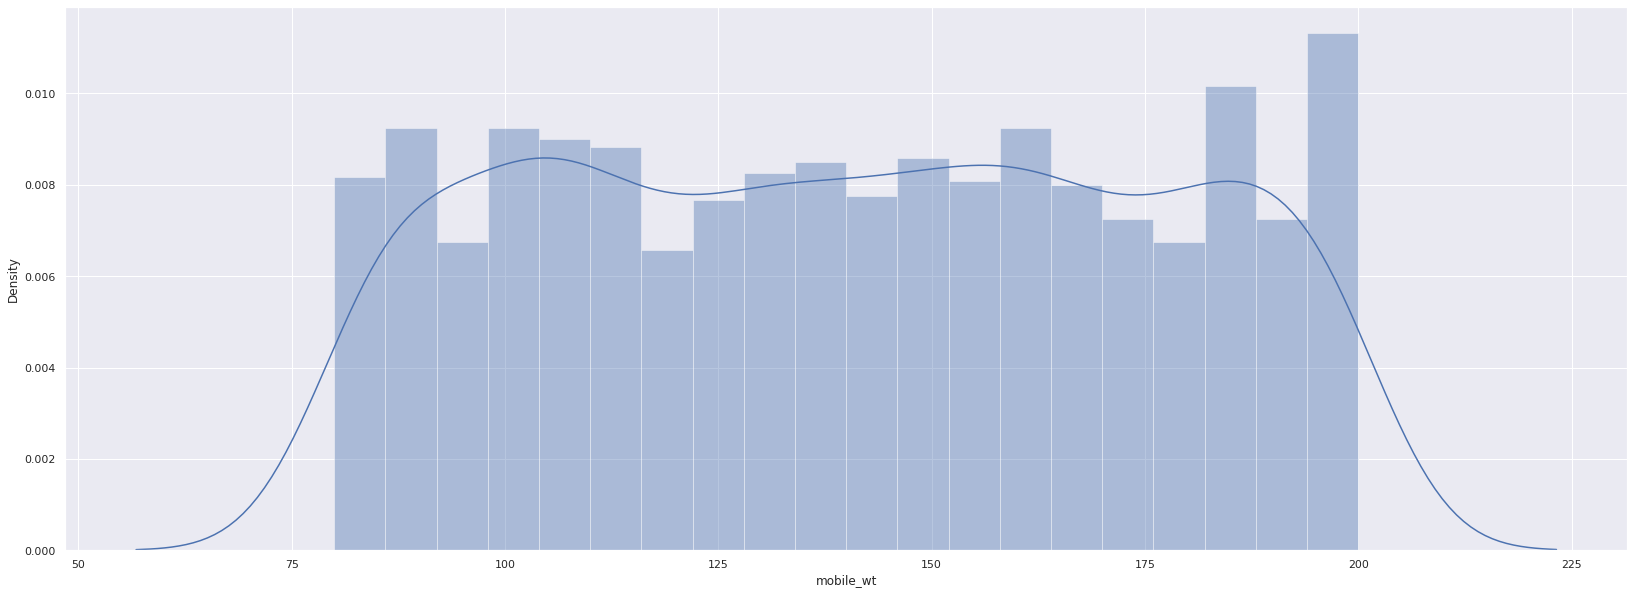

In [121]:
# distribution of 'mobile_wt'
sns.set(rc={'figure.figsize':(28,10)})
sns.distplot(train_data['mobile_wt'],kde_kws={"label": 'fc'}, bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



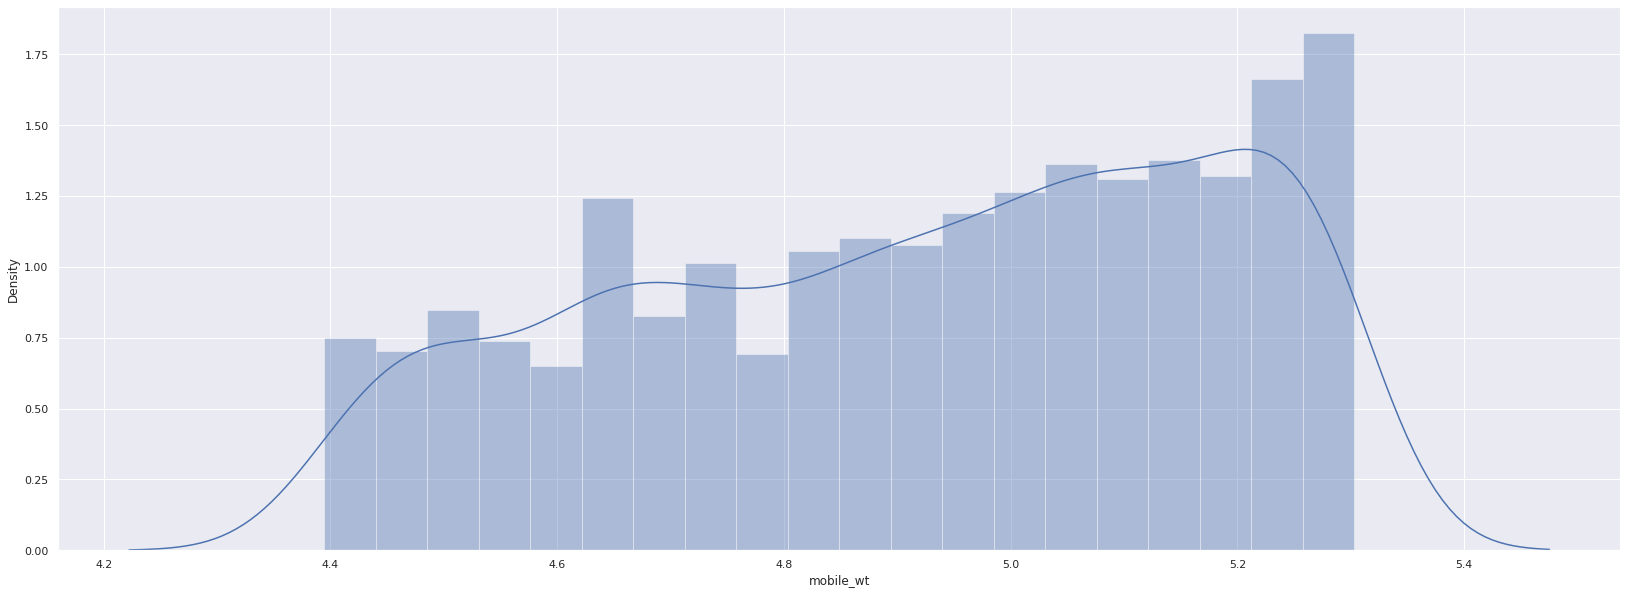

In [122]:
# distribution of log transformed 'mobile_wt'
sns.set(rc={'figure.figsize':(28,10)})
sns.distplot(np.log(train_data["mobile_wt"]- (train_data['fc'].min()-1)),kde_kws={"label": 'fc'}, bins=20)

In [123]:
train_f = train_data.copy()

# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_f.drop(columns=['price_range']), 
                                                  train_f['price_range'], train_size = 0.8, 
                                                  stratify=train_f['price_range'], random_state=17)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.96      0.98      0.97       100
           2       0.97      0.97      0.97       100
           3       0.99      0.99      0.99       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



#### d. creating new feature as volume or area of a phone

In [126]:
train_f = train_data.copy()

# creating new feature
train_f['sc_surface'] = train_f['sc_h'] * train_f['sc_w']

# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_f.drop(columns=['price_range']), 
                                                  train_f['price_range'], train_size = 0.8, 
                                                  stratify=train_f['price_range'], random_state=17)

# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.98      0.97      0.97       100
           2       0.97      0.98      0.98       100
           3       1.00      1.00      1.00       100

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



#### e. exploring all previous feature engineering together

In [127]:
train_f = train_data.copy()

# creating new feature (1)
train_f['sc_surface'] = train_f['sc_h'] * train_f['sc_w']


# 4 buckets with the same size (2)
train_f = train_data.copy()
bins = [0, 500, 1000, 1500, 2000]
labels =[1, 2, 3, 4]
train_f['battery_power_bin'] = pd.cut(train_f['battery_power'], bins=bins,labels=False)
train_f.drop(columns=['battery_power'])

# one hot encoding for categorical columns (3)
categoricals = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
for column in categoricals:
    train_f = onehot_encoding(train_f, column)

# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train_f.drop(columns=['price_range']), 
                                                  train_f['price_range'], train_size = 0.8, 
                                                  stratify=train_f['price_range'], random_state=17)


# Scale X (4)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)



# SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.97      0.97      0.97       100
           2       0.96      0.97      0.97       100
           3       0.99      0.99      0.99       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



### Decision Tree

##### Simple decision tree for dataset

In [128]:
# decision tree
train = train_data.copy()

# split train and validation
X_train, X_val, y_train, y_val = train_test_split(train.drop(columns=['price_range']), 
                                                  train['price_range'], train_size = 0.8,
                                                  stratify=train['price_range'], random_state=17)
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)


# decision tree 
dtree = DecisionTreeClassifier(random_state=17)

# fitting model on Training set
dtree.fit(X_train, y_train)

# predicting on dev set
y_val_pred = dtree.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       100
           1       0.86      0.78      0.82       100
           2       0.84      0.84      0.84       100
           3       0.91      0.95      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [129]:
# decision tree 
dtree = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=10, random_state=17)

# fitting model on Training set
dtree.fit(X_train, y_train)

# predicting on dev set
y_val_pred = dtree.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       100
           1       0.80      0.76      0.78       100
           2       0.83      0.72      0.77       100
           3       0.85      0.95      0.90       100

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



In [130]:
# decision tree 
dtree = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=10, min_samples_split=5 ,random_state=17)

# fitting model on Training set
dtree.fit(X_train, y_train)

# predicting on dev set
y_val_pred = dtree.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       100
           1       0.81      0.78      0.80       100
           2       0.81      0.83      0.82       100
           3       0.92      0.87      0.89       100

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [131]:
# decision tree 
dtree = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=100 ,random_state=17)

# fitting model on Training set
dtree.fit(X_train, y_train)

# predicting on dev set
y_val_pred = dtree.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       100
           1       0.74      0.68      0.71       100
           2       0.71      0.70      0.70       100
           3       0.89      0.88      0.88       100

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



In [132]:
# decision tree 
dtree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=100 ,random_state=17)

# fitting model on Training set
dtree.fit(X_train, y_train)

# predicting on dev set
y_val_pred = dtree.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       100
           1       0.85      0.82      0.84       100
           2       0.83      0.85      0.84       100
           3       0.93      0.91      0.92       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [133]:
# decision tree 
dtree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=100 ,random_state=17)

# fitting model on Training set
dtree.fit(X_train, y_train)

# predicting on dev set
y_val_pred = dtree.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       100
           1       0.86      0.78      0.82       100
           2       0.84      0.84      0.84       100
           3       0.91      0.95      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



##### Testing the effect of different parameters 

best accuracy 0.88 with max_depth = 44 with gini
best accuracy 0.8875 with max_depth = 30 with entropy


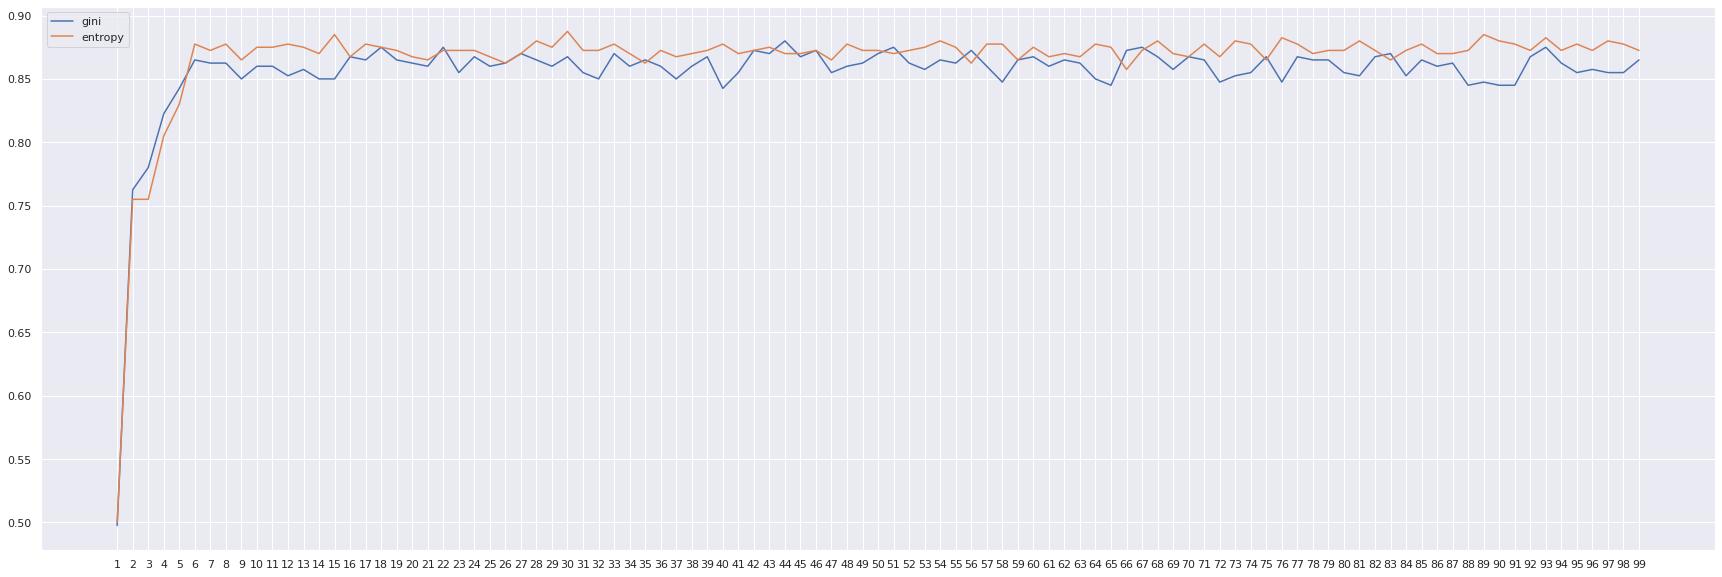

In [138]:
# testing the effect of max_depth
depths = np.arange(1,100)
accuracies1 = []
accuracies2 = []

# loop on different models
for dep in depths:
  dtree = DecisionTreeClassifier(criterion='gini',max_depth=dep)
  dtree.fit(X_train, y_train)
  y_val_pred = dtree.predict(X_val)
  accuracies1.append(metrics.accuracy_score(y_val, y_val_pred))

  dtree = DecisionTreeClassifier(criterion='entropy',max_depth=dep)
  dtree.fit(X_train, y_train)
  y_val_pred = dtree.predict(X_val)
  accuracies2.append(metrics.accuracy_score(y_val, y_val_pred))

# saving the best model
# gini
best_acc1 = max(accuracies1)
best_idx1  = accuracies1.index(best_acc1)

# entropy
best_acc2 = max(accuracies2)
best_idx2  = accuracies2.index(best_acc2)

# Results
print('best accuracy {} with max_depth = {} with gini'.format(best_acc1,depths[best_idx1]))
print('best accuracy {} with max_depth = {} with entropy'.format(best_acc2,depths[best_idx2]))

# plotting the results
plt.figure(figsize=(30,10))
plt.plot(depths, accuracies1, depths, accuracies2)
plt.xticks(depths)
plt.legend(['gini', 'entropy'])
plt.show()

best accuracy 0.8775 with max_depth = 13 with gini
best accuracy 0.88 with max_depth = 7 with entropy


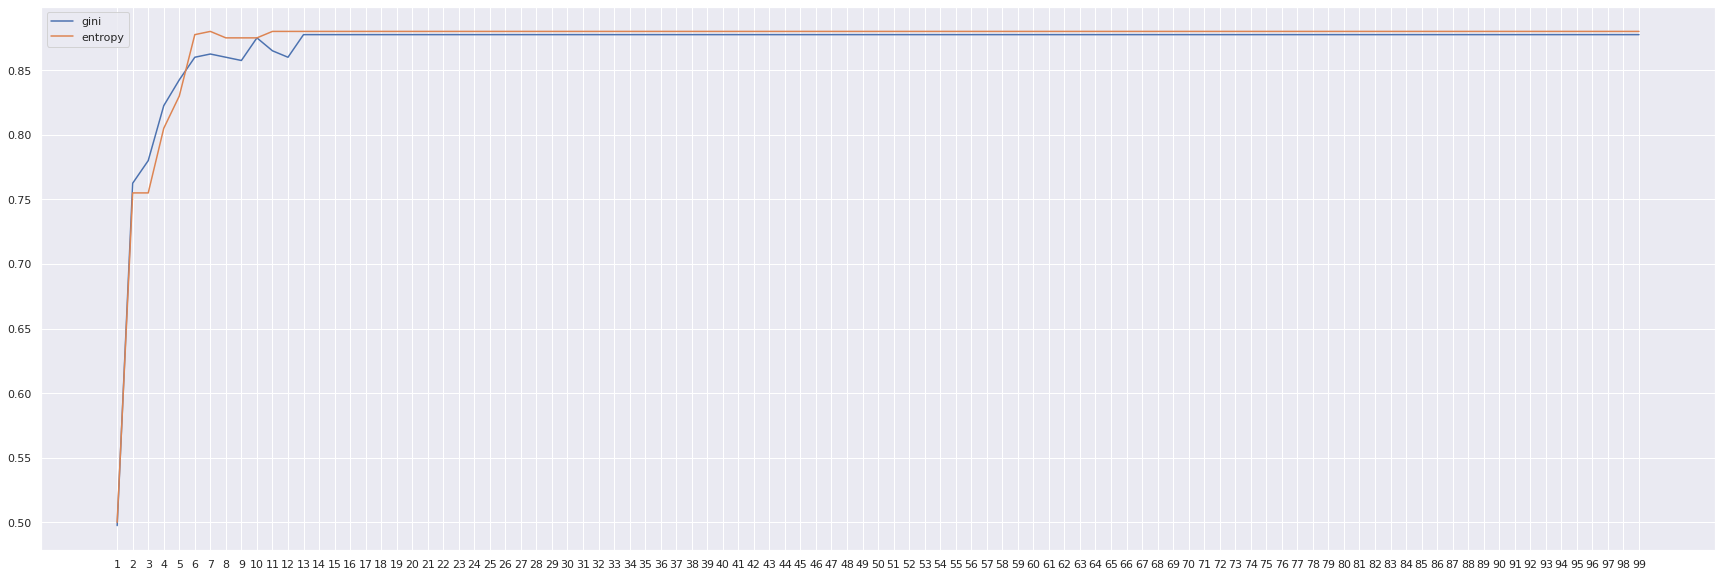

In [139]:
# testing the effect of max_depth
depths = np.arange(1,100)
accuracies1 = []
accuracies2 = []

# loop on different models
for dep in depths:
  dtree = DecisionTreeClassifier(criterion='gini',max_depth=dep, random_state=17)
  dtree.fit(X_train, y_train)
  y_val_pred = dtree.predict(X_val)
  accuracies1.append(metrics.accuracy_score(y_val, y_val_pred))

  dtree = DecisionTreeClassifier(criterion='entropy',max_depth=dep, random_state=17)
  dtree.fit(X_train, y_train)
  y_val_pred = dtree.predict(X_val)
  accuracies2.append(metrics.accuracy_score(y_val, y_val_pred))

# saving the best model
# gini
best_acc1 = max(accuracies1)
best_idx1  = accuracies1.index(best_acc1)

# entropy
best_acc2 = max(accuracies2)
best_idx2  = accuracies2.index(best_acc2)

# Results
print('best accuracy {} with max_depth = {} with gini'.format(best_acc1,depths[best_idx1]))
print('best accuracy {} with max_depth = {} with entropy'.format(best_acc2,depths[best_idx2]))

# plotting the results
plt.figure(figsize=(30,10))
plt.plot(depths, accuracies1, depths, accuracies2)
plt.xticks(depths)
plt.legend(['gini', 'entropy'])
plt.show()

best accuracy 0.8675 with max_depth = 3 with gini
best accuracy 0.88 with max_depth = 2 with entropy


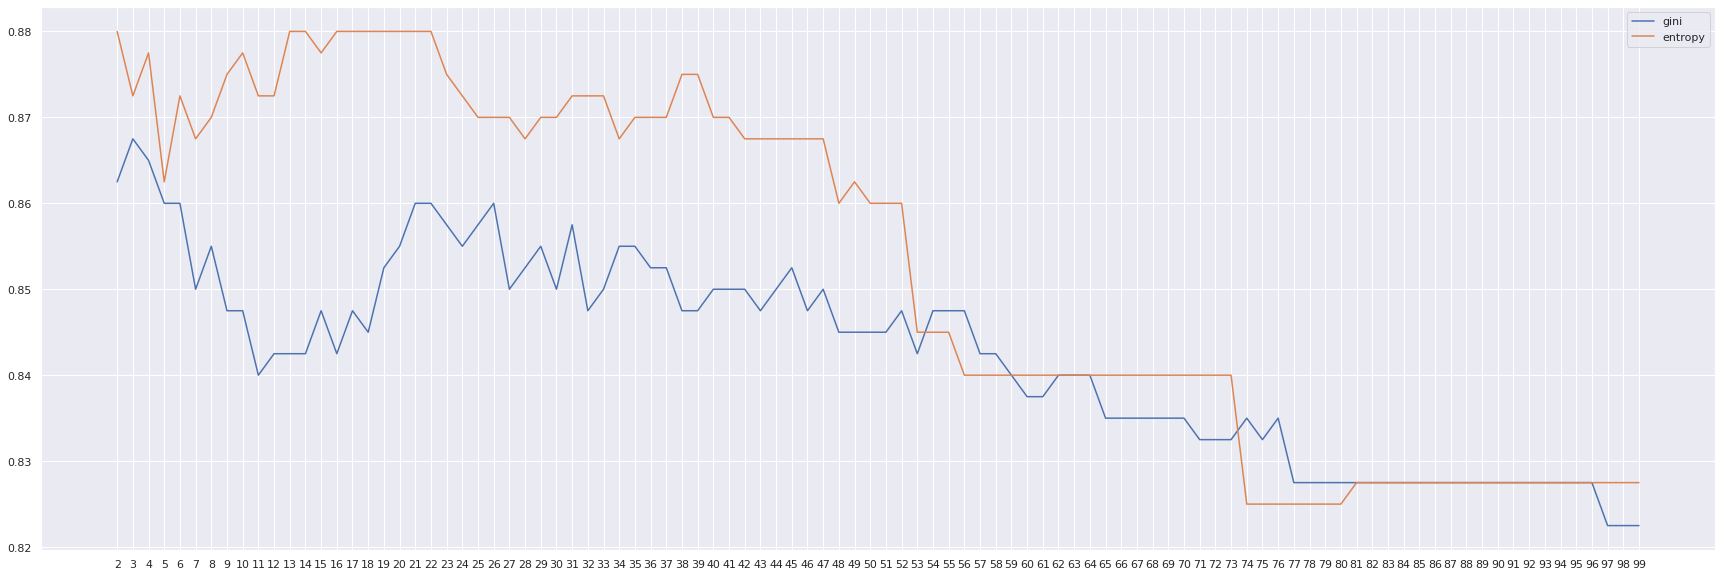

In [140]:
# testing the effect of min_sample_split
min_samples = np.arange(2,100)
accuracies1 = []
accuracies2 = []

# loop on different models
for min_s in min_samples:
  dtree = DecisionTreeClassifier(criterion='gini', min_samples_split=min_s)
  dtree.fit(X_train, y_train)
  y_val_pred = dtree.predict(X_val)
  accuracies1.append(metrics.accuracy_score(y_val, y_val_pred))

  dtree = DecisionTreeClassifier(criterion='entropy' ,min_samples_split=min_s)
  dtree.fit(X_train, y_train)
  y_val_pred = dtree.predict(X_val)
  accuracies2.append(metrics.accuracy_score(y_val, y_val_pred))

# saving the best model
# gini
best_acc1 = max(accuracies1)
best_idx1  = accuracies1.index(best_acc1)

# entropy
best_acc2 = max(accuracies2)
best_idx2  = accuracies2.index(best_acc2)

# Results
print('best accuracy {} with max_depth = {} with gini'.format(best_acc1,min_samples[best_idx1]))
print('best accuracy {} with max_depth = {} with entropy'.format(best_acc2,min_samples[best_idx2]))

# plotting the results
plt.figure(figsize=(30,10))
plt.plot(min_samples, accuracies1, min_samples, accuracies2)
plt.xticks(min_samples)
plt.legend(['gini', 'entropy'])
plt.show()

best accuracy 0.88 with max_depth = 3 with gini
best accuracy 0.88 with max_depth = 2 with entropy


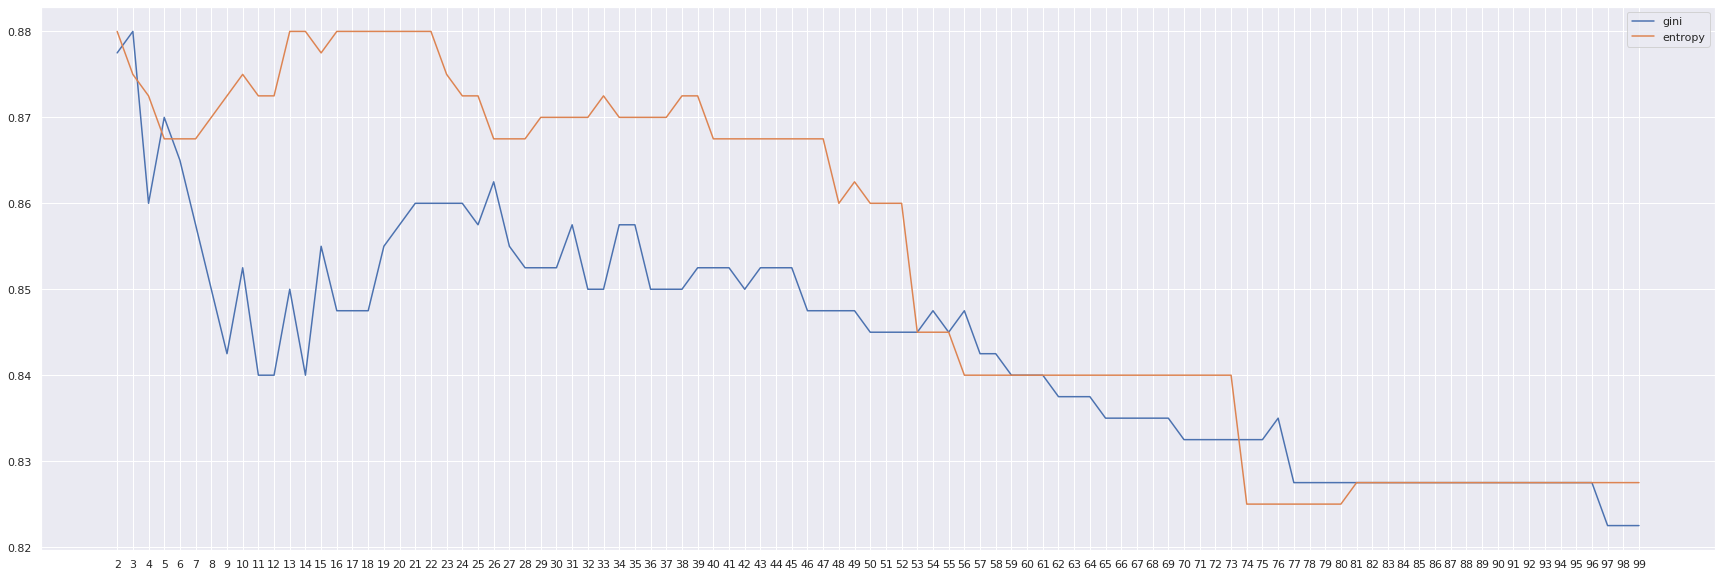

In [141]:
# testing the effect of min_sample_split
min_samples = np.arange(2,100)
accuracies1 = []
accuracies2 = []

# loop on different models
for min_s in min_samples:
  dtree = DecisionTreeClassifier(criterion='gini', min_samples_split=min_s, random_state=17)
  dtree.fit(X_train, y_train)
  y_val_pred = dtree.predict(X_val)
  accuracies1.append(metrics.accuracy_score(y_val, y_val_pred))

  dtree = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_s, random_state=17)
  dtree.fit(X_train, y_train)
  y_val_pred = dtree.predict(X_val)
  accuracies2.append(metrics.accuracy_score(y_val, y_val_pred))

# saving the best model
# gini
best_acc1 = max(accuracies1)
best_idx1  = accuracies1.index(best_acc1)

# entropy
best_acc2 = max(accuracies2)
best_idx2  = accuracies2.index(best_acc2)

# Results
print('best accuracy {} with max_depth = {} with gini'.format(best_acc1,min_samples[best_idx1]))
print('best accuracy {} with max_depth = {} with entropy'.format(best_acc2,min_samples[best_idx2]))

# plotting the results
plt.figure(figsize=(30,10))
plt.plot(min_samples, accuracies1, min_samples, accuracies2)
plt.xticks(min_samples)
plt.legend(['gini', 'entropy'])
plt.show()

##### Pruning

I used codes in the following links for this part

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py    


https://ranvir.xyz/blog/practical-approach-to-tree-pruning-using-sklearn/

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       100
           1       0.84      0.81      0.82       100
           2       0.83      0.80      0.82       100
           3       0.89      0.93      0.91       100

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



Text(0, 0.5, 'total impurity of leaves')

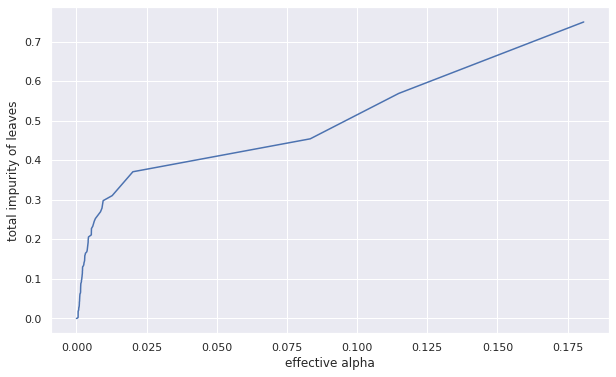

In [142]:
# decision tree with best parameters from previous step +  prunning our decision tree

dtree = DecisionTreeClassifier(random_state=29)

# fitting model on Training set
dtree.fit(X_train, y_train)

# predicting on dev set
y_val_pred = dtree.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

# cost complexity path
path = dtree.cost_complexity_pruning_path(X_train, y_train)
# print(path)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [143]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)


Text(0, 0.5, 'total depth')

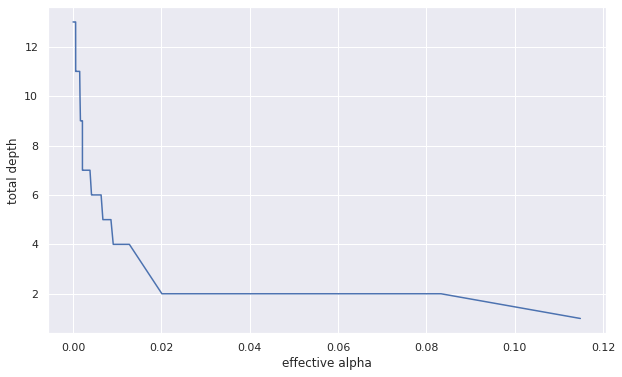

In [144]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

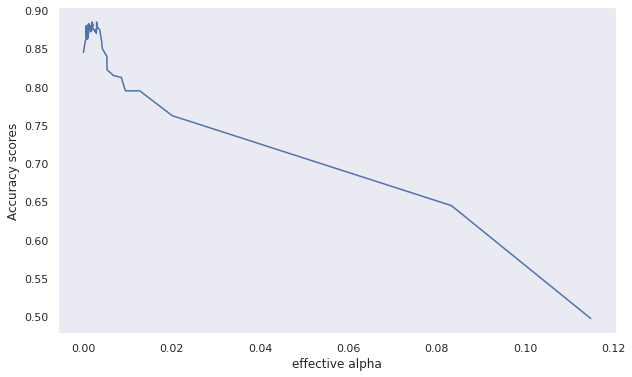

In [145]:
acc_scores = [metrics.accuracy_score(y_val, clf.predict(X_val)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

### Random Forest

In [146]:
# random forest
random_forest = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=400, n_jobs=-1, random_state=17)

# fitting model on training set
random_forest.fit(X_train, y_train)

# predicting on dev set
y_val_pred = random_forest.predict(X_val)

# Results
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       100
           1       0.82      0.81      0.81       100
           2       0.83      0.84      0.84       100
           3       0.96      0.92      0.94       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



# BitCoin Dataset

Question 16 to 27 uses [Bitcoin Dataset](https://www.investing.com/crypto/bitcoin/historical-data)

## Data Preparation

In [ ]:
!ls

Bitcoin_Historical_Data_Test.csv   sample_data
Bitcoin_Historical_Data_Train.csv


In [147]:
# reading data
btc_train = pd.read_csv('Bitcoin_Historical_Data_Train.csv', )
btc_test = pd.read_csv('Bitcoin_Historical_Data_Test.csv')

In [148]:
btc_train

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 01, 2020","7,199.8","7,196.4","7,259.4","7,180.0",420.28K,0.05%
1,"Dec 31, 2019","7,196.4","7,261.5","7,331.0","7,167.4",586.60K,-0.90%
2,"Dec 30, 2019","7,261.8","7,397.5","7,420.9","7,244.1",606.11K,-1.84%
3,"Dec 29, 2019","7,397.5","7,321.6","7,518.9","7,303.0",611.69K,1.04%
4,"Dec 28, 2019","7,321.5","7,261.9","7,375.9","7,256.5",610.96K,0.82%
...,...,...,...,...,...,...,...
3450,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
3451,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
3452,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
3453,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%


In [149]:
# helper function to change the format of Date column
def mdy_to_ymd(d):
    return datetime.strptime(d, '%b %d, %Y').strftime('%Y-%m-%d')

In [150]:
# apply previous function on both train and test sets
btc_train['Date'] = btc_train['Date'].apply(mdy_to_ymd)
btc_test['Date'] = btc_test['Date'].apply(mdy_to_ymd)

In [151]:
btc_train

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-01,"7,199.8","7,196.4","7,259.4","7,180.0",420.28K,0.05%
1,2019-12-31,"7,196.4","7,261.5","7,331.0","7,167.4",586.60K,-0.90%
2,2019-12-30,"7,261.8","7,397.5","7,420.9","7,244.1",606.11K,-1.84%
3,2019-12-29,"7,397.5","7,321.6","7,518.9","7,303.0",611.69K,1.04%
4,2019-12-28,"7,321.5","7,261.9","7,375.9","7,256.5",610.96K,0.82%
...,...,...,...,...,...,...,...
3450,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
3451,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
3452,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
3453,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%


In [152]:
btc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3455 non-null   object
 1   Price     3455 non-null   object
 2   Open      3455 non-null   object
 3   High      3455 non-null   object
 4   Low       3455 non-null   object
 5   Vol.      3455 non-null   object
 6   Change %  3455 non-null   object
dtypes: object(7)
memory usage: 189.1+ KB


In [153]:
# helper function to replace M and K in Vol. column and make the value correct
def process_vol(vol):
  if 'K' in vol:
    return float(vol.replace('K',''))*1000
  if 'M' in vol:
    return float(vol.replace('M',''))*1000000

In [154]:
# removing commas (,) from values in both train and test set
btc_train = btc_train.replace(',', '', regex=True)
btc_test = btc_test.replace(',', '', regex=True)

# removing percent sign (%) from values in both train and test set
btc_train = btc_train.replace('%', '', regex=True)
btc_test = btc_test.replace('%', '', regex=True)

# removing M and K from values in both train and test set and multiply each value to 1,000,000 or 1,000 respectively
btc_train['Vol.'] = btc_train['Vol.'].apply(process_vol)
btc_test['Vol.'] = btc_test['Vol.'].apply(process_vol)

In [155]:
btc_train

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-01,7199.8,7196.4,7259.4,7180.0,420280.0,0.05
1,2019-12-31,7196.4,7261.5,7331.0,7167.4,586600.0,-0.90
2,2019-12-30,7261.8,7397.5,7420.9,7244.1,606110.0,-1.84
3,2019-12-29,7397.5,7321.6,7518.9,7303.0,611690.0,1.04
4,2019-12-28,7321.5,7261.9,7375.9,7256.5,610960.0,0.82
...,...,...,...,...,...,...,...
3450,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00
3451,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00
3452,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00
3453,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.00


In [156]:
# change columns datatypes from object to fload in both train and test set
btc_train = btc_train.astype({'Price':np.float64,
                              'Open':np.float64,
                              'High':np.float64,
                              'Low':np.float64,
                              'Vol.':np.float64,
                              'Change %':np.float64,})

btc_test = btc_test.astype({'Price':np.float64,
                              'Open':np.float64,
                              'High':np.float64,
                              'Low':np.float64,
                              'Vol.':np.float64,
                              'Change %':np.float64,})

# change Date column datatype from object to datetime64[ns] in both train and test set
btc_train['Date'] = pd.to_datetime(btc_train['Date'])
btc_test['Date'] = pd.to_datetime(btc_test['Date'])

In [157]:
btc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3455 non-null   datetime64[ns]
 1   Price     3455 non-null   float64       
 2   Open      3455 non-null   float64       
 3   High      3455 non-null   float64       
 4   Low       3455 non-null   float64       
 5   Vol.      3449 non-null   float64       
 6   Change %  3455 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 189.1 KB


In [158]:
btc_train

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-01,7199.8,7196.4,7259.4,7180.0,420280.0,0.05
1,2019-12-31,7196.4,7261.5,7331.0,7167.4,586600.0,-0.90
2,2019-12-30,7261.8,7397.5,7420.9,7244.1,606110.0,-1.84
3,2019-12-29,7397.5,7321.6,7518.9,7303.0,611690.0,1.04
4,2019-12-28,7321.5,7261.9,7375.9,7256.5,610960.0,0.82
...,...,...,...,...,...,...,...
3450,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00
3451,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00
3452,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00
3453,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.00


**Now the data is READY**

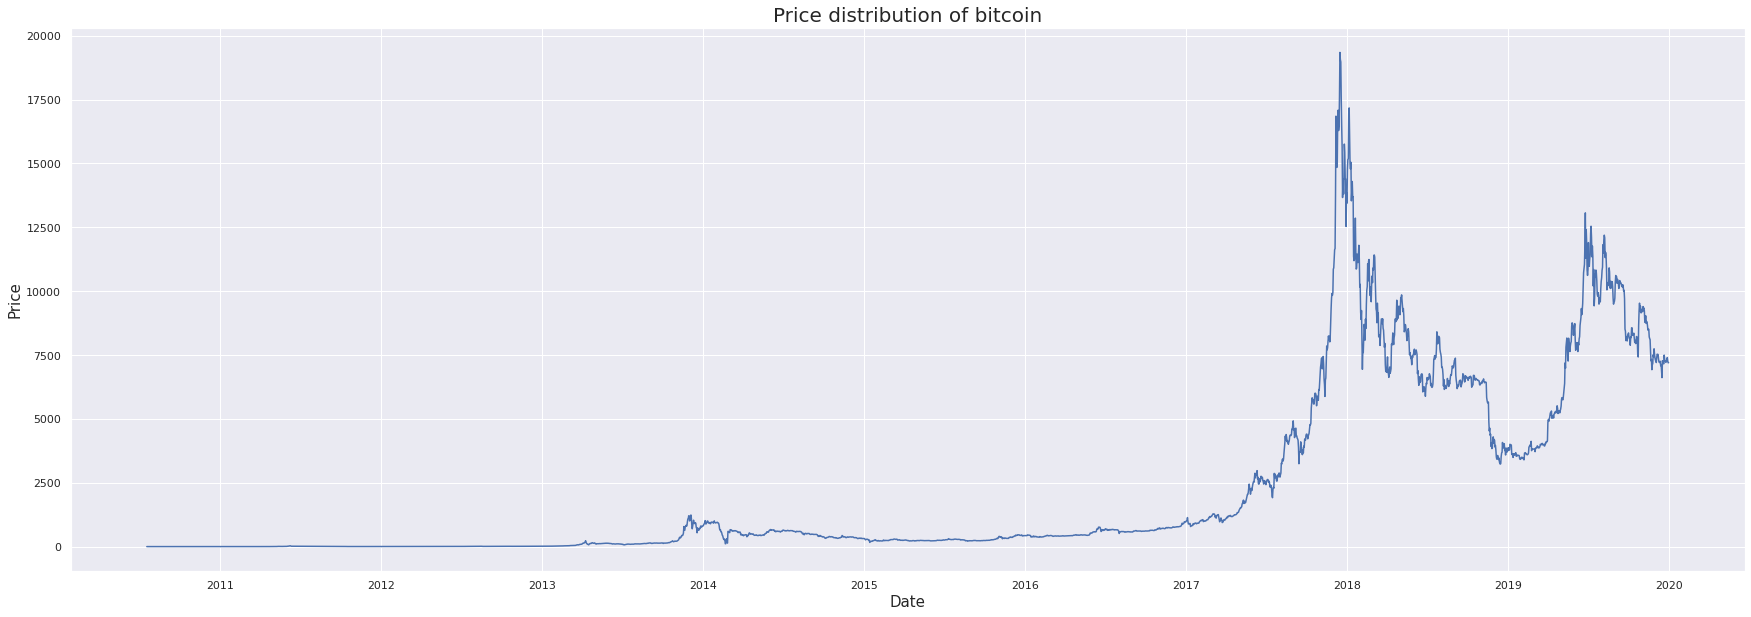

In [160]:
plt.figure(figsize=(30,10))
plt.plot(btc_train['Date'], btc_train['Price'])
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title("Price distribution of bitcoin", fontsize=20)
plt.show()

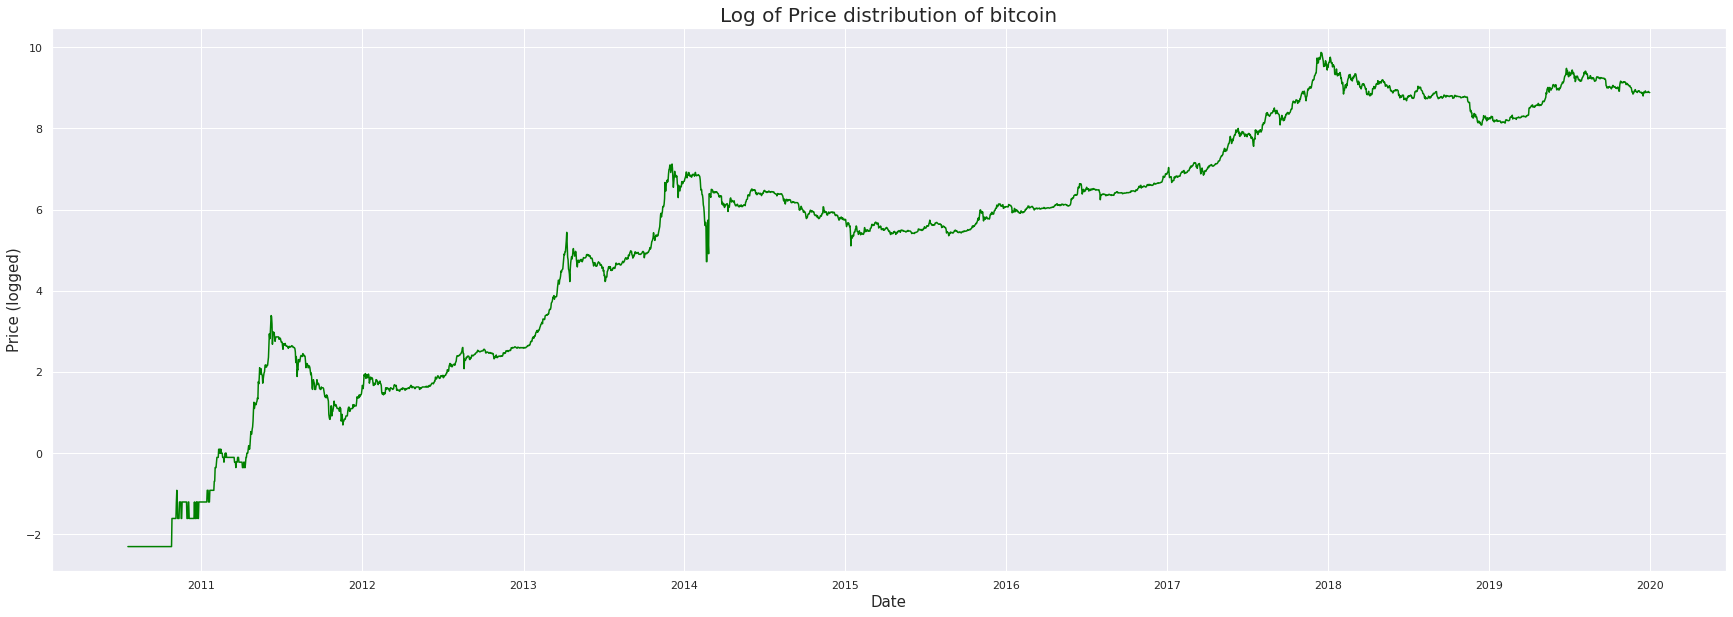

In [161]:
plt.figure(figsize=(30,10))
plt.plot(btc_train['Date'],np.log(btc_train['Price']),color="green")
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price (logged)', fontsize=15)
plt.title("Log of Price distribution of bitcoin", fontsize=20)
plt.show()


In [162]:
# reversing data to get the better form
btc_train = btc_train.iloc[::-1,:].set_index('Date')
btc_test = btc_test.iloc[::-1,:].set_index('Date')


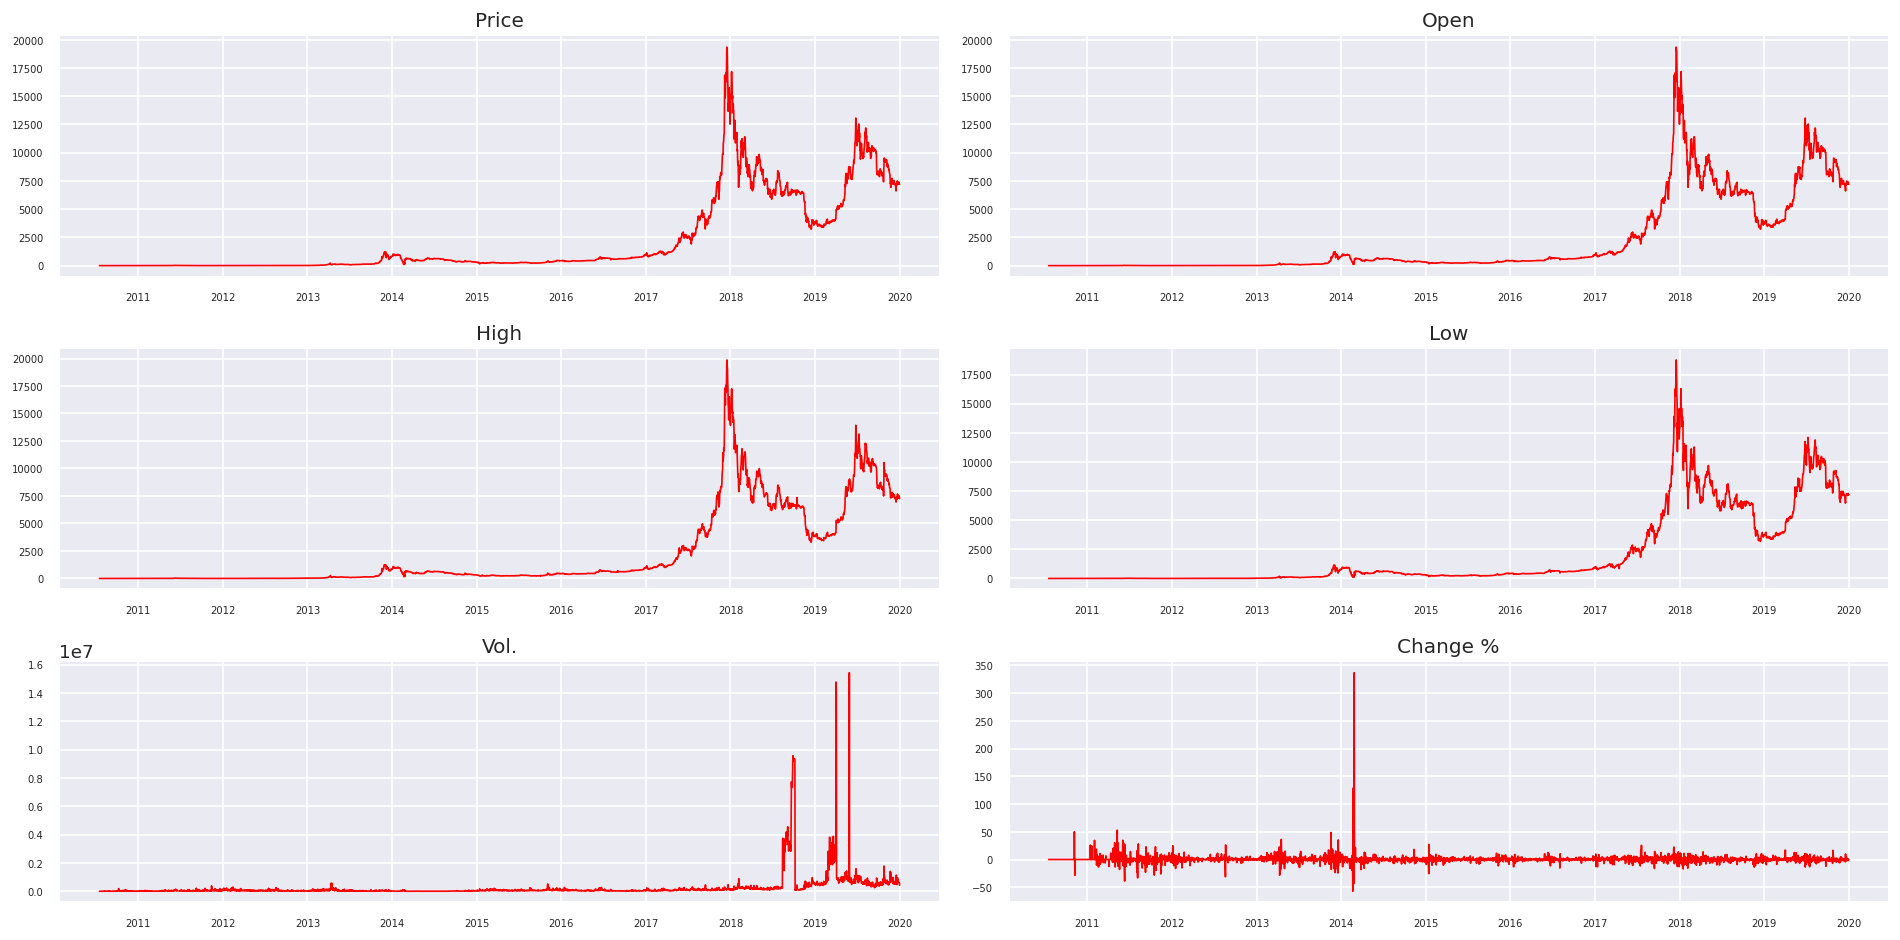

In [164]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(16,8))
for i, ax in enumerate(axes.flatten()):
    data = btc_train[btc_train.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(btc_train.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [165]:
# splitting labels from data
y_train = btc_train['Price']
X_train = btc_train.drop(['Price'], axis=1)

y_test = btc_test['Price']
X_test = btc_test.drop(['Price'], axis=1)

In [166]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3455, 5), (3455,), (486, 5), (486,))

In [167]:
# scaling data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)


In [168]:
X_train

,Open,High,Low,Vol.,Change %
0,-0.627781,-0.625778,-0.631959,-0.283308,-0.061996
1,-0.627752,-0.625778,-0.631959,-0.282743,-0.061996
2,-0.627752,-0.625778,-0.631959,-0.283101,-0.061996
3,-0.627752,-0.625778,-0.631959,-0.282732,-0.061996
4,-0.627752,-0.625778,-0.631959,-0.280910,-0.061996
...,...,...,...,...,...
3450,1.479042,1.444929,1.562235,0.421105,0.038001
3451,1.496362,1.485075,1.576296,0.421946,0.064829
3452,1.518382,1.457562,1.558486,0.415512,-0.286380
3453,1.478926,1.432323,1.535293,0.393015,-0.171749


## Experimenting different models


### AutoRegressive

In [169]:
X_train = X_train.fillna(0)

In [170]:
model = VAR(endog=X_train)
model_fit = model.fit()
prediction = model_fit.forecast(model_fit.y, steps=len(X_test))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning:

y is a deprecated alias for endog, will be removed in version 0.11.0



In [171]:
prediction.shape

(486, 5)

In [172]:
metrics.mean_squared_error( y_true= X_test ,y_pred=prediction, squared=False)

5.183019892072348

### AutoCorrelation

### Moving Average (MA)

### AutoRegressive Integrated Moving Average (ARIMA)

### FaceBook Prophet

### XGBoost

In [190]:
model = XGBRegressor(max_depth=5, n_estimators=2000)
model.fit(btc_train.loc[:,'Open':'Change %'], btc_train['Price'])

y_hat = model.predict(btc_test.loc[:,'Open':'Change %'])


metrics.mean_squared_error(btc_test['Price'], y_hat, squared=False)

[18:39:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


15423.611889376874

In [191]:
(np.abs(y_hat - btc_test['Price'])<=5).sum()/y_hat.shape[0]

0.026748971193415638

### LSTM

In [192]:
# scaling data
scaler = StandardScaler()
scaler.fit(btc_train)
btc_train_sc = pd.DataFrame(scaler.transform(btc_train), columns=btc_train.columns)
btc_test_sc = pd.DataFrame(scaler.transform(btc_test), columns=btc_test.columns)

In [175]:
sequence_length = 50
index_Close = 0
def partition_dataset(sequence_length, data):
    index_Close = 0
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data.iloc[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data.iloc[i, index_Close]) #contains the prediction values for validation (3rd column = Close),  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
X_train, y_train = partition_dataset(sequence_length, btc_train_sc)
X_test, y_test = partition_dataset(sequence_length, btc_test_sc)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(X_train[1][sequence_length-1][index_Close])
print(y_train[0])

(3405, 50, 6) (3405,)
(436, 50, 6) (436,)
-0.6281986243903106
-0.6281986243903106


In [176]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = X_train.shape[1]
print(n_neurons, X_train.shape[1], X_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

50 50 6


In [177]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            11400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 5)                 255       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 31,861
Trainable params: 31,861
Non-trainable params: 0
_________________________________________________________________


In [178]:

# Training the model
epochs = 20
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(X_test, y_test)
                   )
                    

Epoch 1/20
213/213 [==============================] - 13s 45ms/step - loss: nan - val_loss: nan
Epoch 2/20
213/213 [==============================] - 9s 42ms/step - loss: nan - val_loss: nan
Epoch 3/20
213/213 [==============================] - 9s 41ms/step - loss: nan - val_loss: nan
Epoch 4/20
213/213 [==============================] - 9s 42ms/step - loss: nan - val_loss: nan
Epoch 5/20
213/213 [==============================] - 10s 45ms/step - loss: nan - val_loss: nan
Epoch 6/20
213/213 [==============================] - 9s 42ms/step - loss: nan - val_loss: nan
Epoch 7/20
213/213 [==============================] - 9s 41ms/step - loss: nan - val_loss: nan
Epoch 8/20
213/213 [==============================] - 9s 42ms/step - loss: nan - val_loss: nan
Epoch 9/20
213/213 [==============================] - 9s 43ms/step - loss: nan - val_loss: nan
Epoch 10/20
213/213 [==============================] - 9s 42ms/step - loss: nan - val_loss: nan
Epoch 11/20
213/213 [==========================

### AdaBoost

In [193]:
model = AdaBoostRegressor()
model.fit(btc_train.loc[:,'Open':'Change %'].fillna(0), btc_train['Price'])

y_hat = model.predict(btc_test.loc[:,'Open':'Change %'])

metrics.mean_squared_error(btc_test['Price'], y_hat, squared=False)

15756.651095562209

In [194]:
(np.abs(y_hat - btc_test['Price'])<=5).sum()/y_hat.shape[0]

0.00823045267489712

### Random Forest

In [195]:
model = RandomForestRegressor(max_depth = 5, n_estimators=1000, random_state = 17)
model.fit(btc_train.loc[:,"Open":"Change %"].fillna(0), btc_train['Price'])

y_hat = model.predict(btc_test.loc[:,"Open":"Change %"])
metrics.mean_squared_error(btc_test['Price'], y_hat, squared=False)


15527.195109163875

In [196]:
(np.abs(y_hat - btc_test['Price'])<=5).sum()/y_hat.shape[0]

0.01646090534979424